In [1]:
push!(LOAD_PATH, pwd()*"/..")
using SIS,IM,PayloadGraph,PyPlot, Epidemics,JLD, TwoLevelGraphs,Dierckx,Plotting,DataAnalysis,GraphGeneration
using NLsolve
import LightGraphs


In [347]:
data_dir_path = "../../data/"  #"/mnt/D/windows/MIT/classes/6/338/project/data/"
filenames = split(readstring(`ls $data_dir_path`));
filenames[1:10]

10-element Array{SubString{String},1}:
 "epidemics_graph_2017-01-22T20:03:39.jld"        
 "epidemics_graph_2017-01-22T21:13:36.jld"        
 "epidemics_graph_2017-01-22T21:24:49.jld"        
 "epidemics_graph_2017-01-23T20:34:24.jld"        
 "epidemics_graph_2017-01-23T20:41:42.jld"        
 "epidemics_graph_2017-01-23T20:55:30.jld"        
 "epidemics_graph_2017-01-23T21:07:32.jld"        
 "epidemics_graph_2017-01-23T21:21:34.jld"        
 "epidemics_graph_2017-01-23T21:32:30.jld"        
 "epidemics_graph_compact_2016-10-16T17:42:28.jld"

In [460]:
function load_tlstates_multiple_paths(paths)
    tlstates = Array(TwoLevel,0) 
    runs = Array(EpidemicRun,0) 
    params,epidemic_params,k,graph_information,graph_type,num_trials = 0,0,0,0,0,0
    for path in paths
        println(path)
        params,yvals,pvals,epidemic_params,k,graph_information,graph_type,runs_curr,num_trials_curr = load_p_reach_data(path)
        println(params)
        tlstates = vcat(tlstates,get_two_level_states_from_runs(runs_curr))
        runs = vcat(runs,runs_curr)
        num_trials += num_trials_curr
    end
    return tlstates,runs,params,epidemic_params,k,graph_information,graph_type,num_trials
end

load_tlstates_multiple_paths (generic function with 1 method)

In [461]:
# paths = [data_dir_path*_ for _ in filenames[4:9]]
# ret = load_tlstates_multiple_paths(paths)
# tlstates,runs,params,epidemic_params,k,graph_information,graph_type,num_trials  = ret

../../data/epidemics_graph_2017-01-23T20:34:24.jld
Dict{AbstractString,Any}(Pair{AbstractString,Any}("compact",false),Pair{AbstractString,Any}("graph_information",Epidemics.GraphInformation(#10051,empty undirected graph,true,TwoLevelGraphs.TwoLevelGraph(empty undirected graph,TwoLevelGraphs.TwoLevel(Number[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],400,20,20,0,1,19),Array{Int64,1}[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],[41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60],[61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80],[81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],[101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120],[121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140],[141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160],[161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177

(TwoLevelGraphs.TwoLevel[TwoLevelGraphs.TwoLevel(Number[19,1,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,1,1,19),TwoLevelGraphs.TwoLevel(Number[19,1,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,1,1,19),TwoLevelGraphs.TwoLevel(Number[19,1,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,1,1,19),TwoLevelGraphs.TwoLevel(Number[19,1,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,1,1,19),TwoLevelGraphs.TwoLevel(Number[19,1,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,1,1,19),TwoLevelGraphs.TwoLevel(Number[19,0,1,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,2,1,19),TwoLevelGraphs.TwoLevel(Number[19,0,1,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,2,1,19),TwoLevelGraphs.TwoLevel(Number[19,0,1,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,2,1,19),TwoLevelGraphs.TwoLevel(Number[19,0,1,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,2,1,19),TwoLevelGraphs.TwoLevel(Number[19,0,1,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,2,1,19)  …  TwoLevelGraphs.TwoLev

In [556]:
path = data_dir_path*filenames[2]
params,yvals,pvals,epidemic_params,k,graph_information,graph_type,runs,num_trials = load_p_reach_data(path)
tlstates = get_two_level_states_from_runs(runs);

In [557]:
t = graph_information.data.t
#k = t.l + t.r
l = t.l
r = t.r
m = t.m
N = epidemic_params.N
alpha = epidemic_params.alpha
beta = epidemic_params.beta
t = TwoLevel(N,m,l,r)

TwoLevelGraphs.TwoLevel(Number[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,0,19,1)

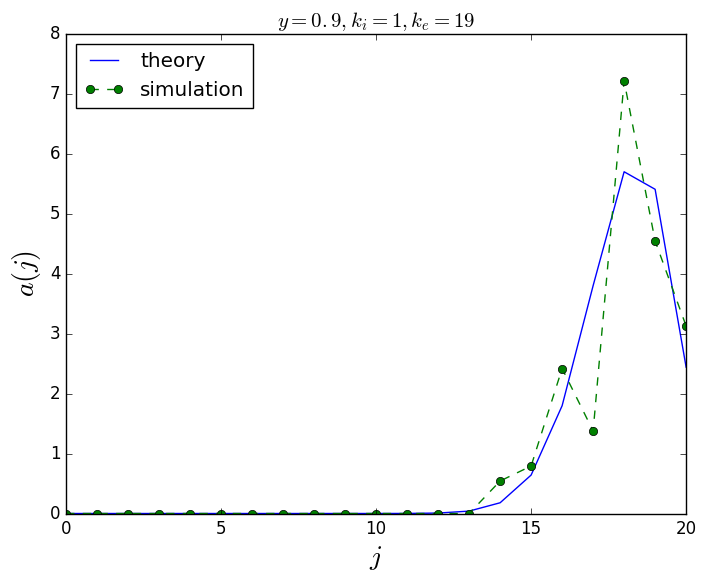

24 instances


PyObject <matplotlib.text.Text object at 0x382178c10>

In [570]:
y_desired = 0.9
tol_fac = 1.0
tol = 0.0026*tol_fac#y_desired*(1-y_desired)*0.1
t.i = y_desired*N
distr = get_mean_distribution_from_states(tlstates,y_desired,tol)
b = get_stationary_distribution_nlsolve_finite_size(t,alpha,beta)
plot(b,label="theory")
plot(distr,"--o",label="simulation")
ylim([0,8])
xlabel(L"j",size=20)
ylabel(L"a(j)",size=20)
legend(loc="best")
title(latexstring("\$y = $(y_desired), k_i = $l, k_e = $r\$"),size=15)

Evolution of distribution animation
-----

In [507]:
for i = 1:length(runs)
    if runs[i].fixed
        println("i: $i, ", length(runs[i].infecteds_vs_time))
    end
end

i: 127, 7116
i: 416, 6394


In [508]:
run_idx = 127

function get_infecteds_by_clusters_vs_time1(runs::Array{EpidemicRun,1},run_idx::Int)
    infecteds_by_nodes_vs_time = runs[run_idx].infecteds_by_nodes_vs_time 
    clusters= runs[1].graph_information.data.clusters
    return get_infecteds_by_clusters_vs_time(clusters,infecteds_by_nodes_vs_time)
end

function get_two_level_states_vs_time(runs::Array{EpidemicRun,1},run_idx::Int)
    infecteds_by_nodes_vs_time = runs[run_idx].infecteds_by_nodes_vs_time 
    two_level_graph = runs[1].graph_information.data
    return DataAnalysis.get_two_level_states(two_level_graph,infecteds_by_nodes_vs_time)
end


infecteds_by_clusters_vs_time = get_infecteds_by_clusters_vs_time1(runs,run_idx);
tlstates = get_two_level_states_vs_time(runs,run_idx);

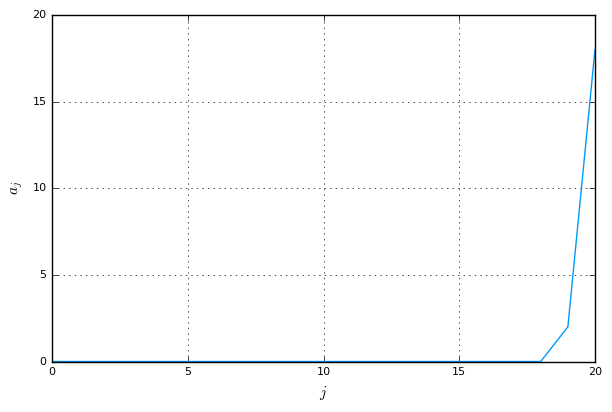

INFO: Saved animation to /Users/julian/Dropbox/ubuntu_home/Harvard/research/desai/population/src/notebooks/tmp.gif


Plots.AnimatedGif("/Users/julian/Dropbox/ubuntu_home/Harvard/research/desai/population/src/notebooks/tmp.gif")

In [509]:
using Plots
stride = 40
anim = @animate for i = 1:stride:length(tlstates)-stride
    vec = zeros(tlstates[i].a)
    for j = 0:stride-1
        vec += tlstates[i+j].a
    end
    vec /= stride
    
    Plots.plot(0:length(vec)-1,vec,ylim=[0,20],label="")
    Plots.xlabel!(L"$j$")
    Plots.ylabel!(L"$a_j$")
end every 1

gif(anim, "tmp.gif",fps=20)

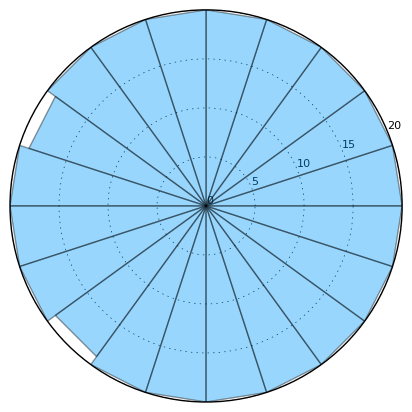

INFO: Saved animation to /Users/julian/Dropbox/ubuntu_home/Harvard/research/desai/population/src/notebooks/tmp1.gif


Plots.AnimatedGif("/Users/julian/Dropbox/ubuntu_home/Harvard/research/desai/population/src/notebooks/tmp1.gif")

In [510]:
pyplot()
stride=40
anim = @animate for i = 1:stride:length(infecteds_by_clusters_vs_time)-stride
    vec = zeros(infecteds_by_clusters_vs_time[i])
    for j = 0:stride-1
        vec += infecteds_by_clusters_vs_time[i+j]
    end
    vec /= stride
    extent = 2*pi
    theta = 0:extent/length(vec):extent
    Plots.bar(theta,vec,proj=:polar,alpha=0.4,ylim=[0,20],xticks=[],label="")
#     Plots.ylim([0,20])
end every 1
gif(anim, "tmp1.gif",fps=20)

In [554]:
k = 20
y_n = 0.2
c_r = 2.0#0.18
N = 400#100000#400
n_n = y_n*N#10#80#y_n*N
beta = 4.0/(c_r*n_n)
alpha = (N*beta)/n_n
# alpha = 0.0
println("N=$N, alpha = $alpha, beta = $beta")

#Generate a random startin vector
m = 20#20 number of nodes in a community
n = Int(N/m) 
l = 15#Int(m/2)#10#internal
r = 5#2#Int(m/2)#2 #external

t = TwoLevel(N,m,l,r)
#distribute_randomly(t,n)
# yvals,pvals,s_tl = get_p_reach_theory(t,alpha,beta,N)


N=400, alpha = 0.125, beta = 0.025


TwoLevelGraphs.TwoLevel(Number[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,0,5,15)

Plot of effective values of $y$, $y^2$ and $s$
----------------------------------------------

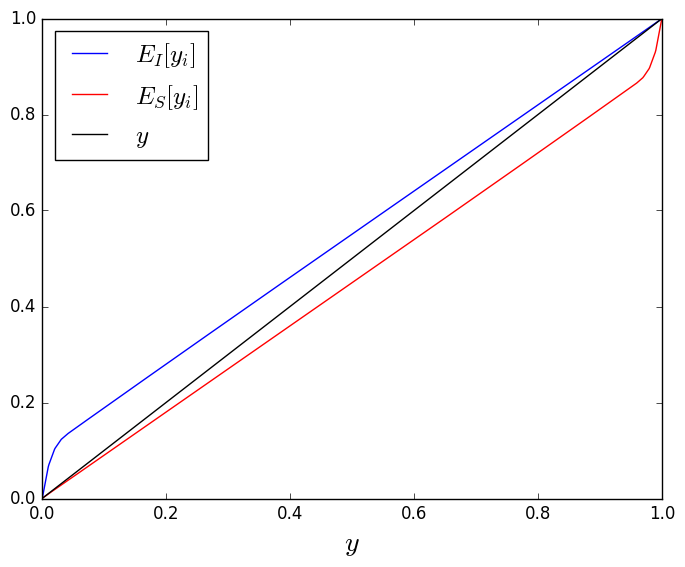

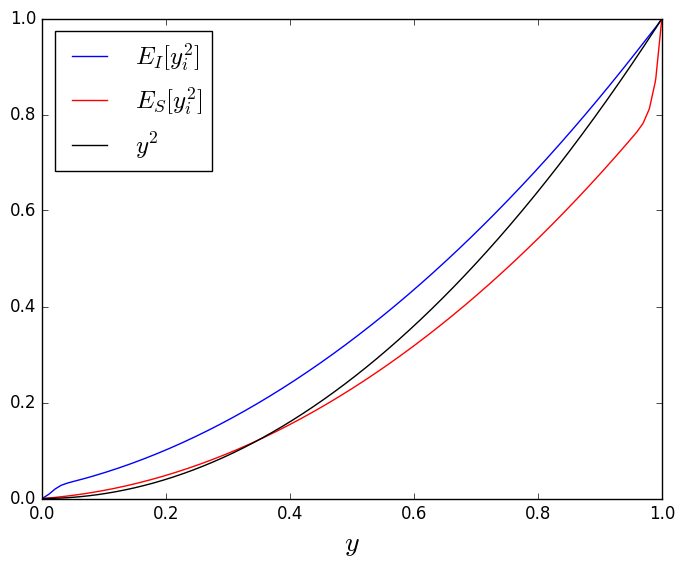

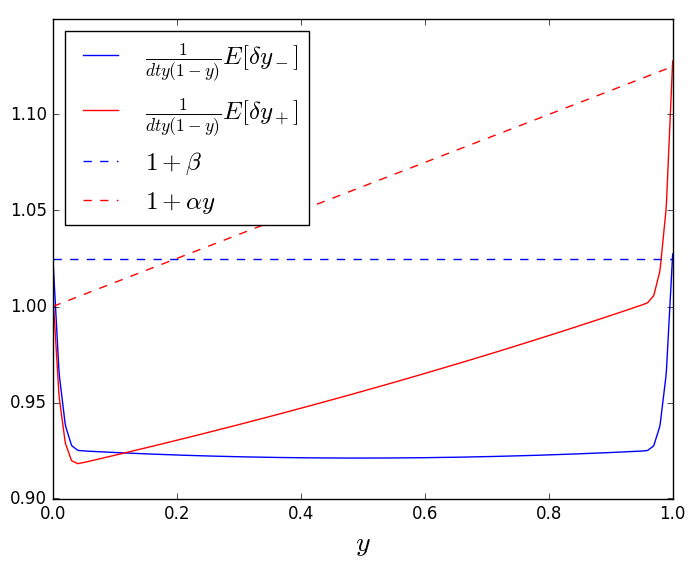

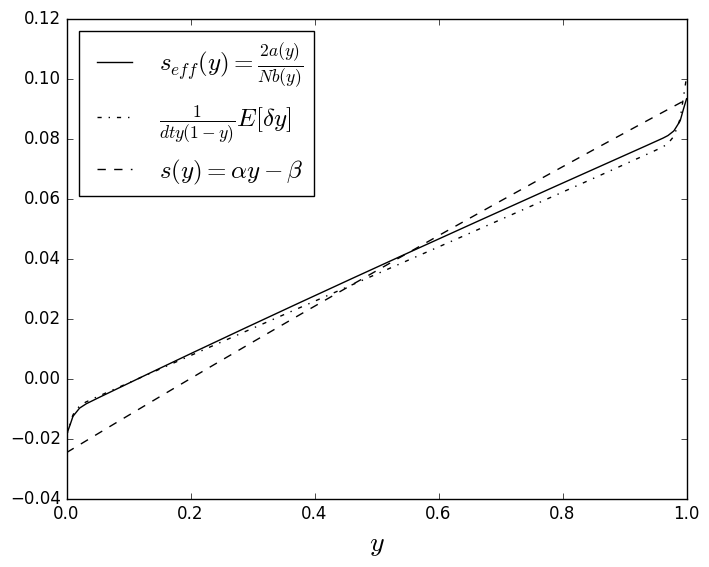

PyObject <matplotlib.text.Text object at 0x382a1fa10>

In [555]:
y_inf_interp,y_sq_inf_interp,y_susc_interp,y_sq_susc_interp,s_birth_interp,s_death_interp,s_interp,splus_interp = get_interpolations(t,alpha,beta,true,100)
yy = 0:0.001:1
plot(yy,evaluate(y_inf_interp,yy),"-b",label=L"$E_{I}[y_i]$")
plot(yy,evaluate(y_susc_interp,yy),"-r",label=L"$E_{S}[y_i]$")
plot(yy,yy,"-k",label=L"$y$")
legend(loc="best",fontsize=18)
xlim([0,1])
ylim([0,1])
xlabel(L"$y$",size=20)


figure()
plot(yy,evaluate(y_sq_inf_interp,yy),"-b",label=L"$E_{I}[y_i^2]$")
plot(yy,evaluate(y_sq_susc_interp,yy),"-r",label=L"$E_{S}[y_i^2]$")
plot(yy,yy.^2,"-k",label=L"$y^2$")
legend(loc="best",fontsize=18)
xlim([0,1])
ylim([0,1])
xlabel(L"$y$",size=20)


figure()
plot(yy,evaluate(s_death_interp,yy),"-b",label=L"$\frac{1}{dt y (1-y)} E[\delta y_-]$")
plot(yy,evaluate(s_birth_interp,yy),"-r",label=L"$\frac{1}{dt y (1-y)} E[\delta y_+]$")
plot(yy,0*yy + 1 + beta,"--b",label=L"$1 + \beta$")
plot(yy,1 + alpha*yy,"--r",label=L"$1 + \alpha y$")
legend(loc="best",fontsize=18)
xlim([0,1])
xlabel(L"$y$",size=20)
# ylim([0,1])

figure()
plot(yy,2*evaluate(s_interp,yy)./evaluate(splus_interp,yy),"-k",label=L"$s_{eff}(y) = \frac{2 a(y)}{N b(y)}$")
plot(yy,evaluate(s_interp,yy),"-.k",label=L"$\frac{1}{dt y (1-y)} E[\delta y]$")
plot(yy,2*(alpha*yy - beta)./(2 + alpha*yy + beta),"--k",label=L"$s(y) = \alpha y - \beta$")
legend(loc="best",fontsize=18)
xlim([0,1])
# axhline(0.0,color="k",linestyle=":")
xlabel(L"$y$",size=20)
# ylim([0,1])

In [131]:
t

TwoLevelGraphs.TwoLevel(Number[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],400,20,20,0,5,15)

In [310]:
gamma = 0.919705
# gamma = gamma_out
mat = generate_transition_matrix(t,alpha,beta,gamma)
arr = nullspace(mat)
arr *= t.n/sum(arr)
get_frac_infected(arr,t)

0.37194186899561593

In [313]:
alpha,beta

(0.125,0.025)

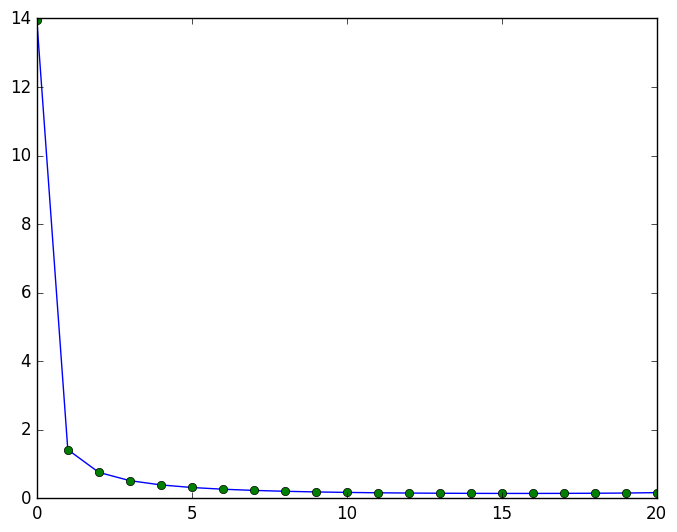

  0.226273 seconds (118.90 k allocations: 6.456 MB)
  0.016904 seconds (265.50 k allocations: 5.999 MB)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x34783a590>

In [320]:
y_desired = 0.1
t.i = y_desired*N
finite_size_effects =true
@time a = get_stationary_distribution_nonlinear_theory(N,m,l,r,y_desired,alpha,beta,finite_size_effects)
@time b = get_stationary_distribution_nlsolve_finite_size(t,alpha,beta)
pygui(false)
plot(a)
plot(b,"o")
# semilogy(arr,"o")

In [26]:
function f!(x,fvec,t,alpha,beta)
    gamma = x[end-1]
    a = x[1:end-2]
    m = generate_transition_matrix(t,alpha,beta,gamma)
    fvec[1:end-2] = m*a
    fvec[end-1] = get_frac_infected(a,t)-t.i/t.N
    fvec[end] = sum(a) - t.n
end


function get_stationary_distribution_nlsolve(t,alpha,beta,finite_size=false)
    fn(x,y) = f!(x,y,t,alpha,beta)
    res = nlsolve(fn,ones(t.m+3))
    
    if ~res.f_converged
        println(res)
        println("Problem, didn't converge")
    end
    println(res.zero[end])
    return res.zero[1:end-2],res.zero[end-1]
end

get_stationary_distribution_nlsolve (generic function with 2 methods)